<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving mnist_test.csv to mnist_test (1).csv


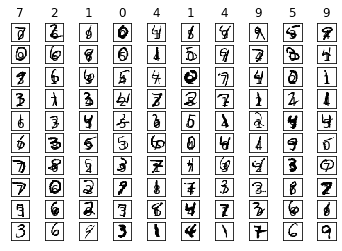

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
from google.colab import files

uploaded = files.upload()

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


In [0]:
vector_list = np.arange(10*size_col*size_col).reshape(10, size_row, size_col)

In [0]:
for nx in range(0, 10):
  for ny in range(0, size_row):
    for nz in range(0, size_col):
      vector_list[nx][ny][nz] = 0

In [19]:
label_list = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(100):
  label_list[list_label[i]] = label_list[list_label[i]] + 1

print(label_list)

[8, 14, 8, 11, 14, 7, 10, 15, 2, 11]


In [0]:
for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    print(im_matrix)

    for ny in range(0, size_row):
      for nz in range(0, size_col):
        vector_list[label][ny][nz] = vector_list[label][ny][nz] + im_matrix[ny][nz]

print(vector_list)

In [0]:
#평균내기

for i in range(0, 10):
  vector_list[i] = vector_list[i] / label_list[i]

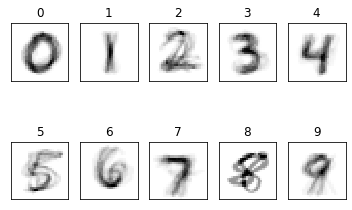

In [24]:
for i in range(10):

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(vector_list[i], cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

In [0]:
theta = np.random.normal(size=(size_row*size_col))

In [0]:
def sigmoid(z): 
  g = 1 / (1 + np.exp(-z)) 
  
  return g 

In [37]:
z_list = []
for i in range(0, 10):
  z_list.append(0.0)

print(z_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [49]:
for i in range(0, 100):
  label       = list_label[i]
  im_vector   = list_image[:, i]
  im_matrix   = im_vector.reshape((size_row, size_col))
  y = 0
  for ny in range(0, size_row):
      for nz in range(0, size_col):
        y = y + theta[size_col*ny + nz]*im_matrix[ny][nz]
  # print(y)
  z_list[label] = z_list[label] + sigmoid(y)
  # print(sigmoid(y))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [0]:
#평균내기

for i in range(0, 10):
  z_list[i] = z_list[i] / label_list[i]

In [52]:
print(z_list)

[0.5, 0.6428571431736698, 0.3726776563182899, 1.0909090909090908, 0.35714285714285715, 0.8571428571428571, 0.3, 0.6666666666666666, 0.5, 0.7272727268669205]
